# 0. Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data

In [4]:
user_ratings = pd.read_csv('user_ratings.csv', index_col=False)
user_ratings = user_ratings[['userId', 'title', 'rating']]
user_ratings_pivot = user_ratings.pivot_table(index='userId', columns='title', values='rating', aggfunc='mean')
user_ratings_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Dealing with sparsity

$ \text{sparsity} = \frac{\text{empty cells}}{\text{total cells}}$

## Measuring sparsity

In [5]:
number_of_empty = user_ratings_pivot.isnull().values.sum()
total_number = user_ratings_pivot.size
sparsity = number_of_empty/total_number
print(sparsity)

0.9829922460483859


- we have around 98% of null data, it means that the table is just around 2% filled. 
- We can have problems in using KNN with sparse data

In [6]:
# Measuring sparsity per column 
user_ratings_pivot.notnull().sum()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Length: 9719, dtype: int64

- Matrix factorization is when we decompose the user-rating matrix into the product of two lower dimensionality matrices.

In [7]:
sorted_occupied_count = user_ratings_pivot.notnull().sum().sort_values()
sorted_occupied_count

title
'71 (2014)                                                                          1
Latter Days (2003)                                                                  1
Late Shift, The (1996)                                                              1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Night Shopping (2001)                                                          1
                                                                                 ... 
Matrix, The (1999)                                                                278
Silence of the Lambs, The (1991)                                                  279
Pulp Fiction (1994)                                                               307
Shawshank Redemption, The (1994)                                                  317
Forrest Gump (1994)                                                               329
Length: 9719, dtype: int64

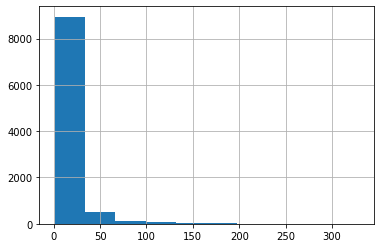

In [8]:
sorted_occupied_count.hist()
plt.show()

- Note that the majority of users have given between 0 and 50 rates. 

# 3. Matrix factorization

>  **Add exercises here !!!!!!!!!**

# 4. Singular Value Decomposition (SVD)

## Prepping our data

In [9]:
print(user_ratings_pivot.shape)

(610, 9719)


In [10]:
# row means for each user
avg_ratings = user_ratings_pivot.mean(axis=1)
print(avg_ratings)

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Length: 610, dtype: float64


In [11]:
#type(avg_ratings)

# Series into array
#avg_ratings.array

In [12]:
# Centering the ratings
user_ratings_pivot_centered = user_ratings_pivot.sub(avg_ratings, axis=0)
user_ratings_pivot_centered.fillna(0, inplace=True)
print(user_ratings_pivot_centered)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1         0.000000                                      0.0   
2         0.000000                                      0.0   
3         0.000000                                      0.0   
4         0.000000                                      0.0   
5         0.000000                                      0.0   
...            ...                                      ...   
606       0.000000                                      0.0   
607       0.000000                                      0.0   
608       0.000000                                      0.0   
609       0.000000                                      0.0   
610       0.311444                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2              

## Applying SVD

In [13]:
from scipy.sparse.linalg import svds

In [14]:
# default number of latent features is 6, but we can define other values
U, sigma, Vt = svds(user_ratings_pivot_centered)

In [15]:
print(U.shape)

(610, 6)


In [16]:
print(Vt.shape)

(6, 9719)


In [17]:
print(sigma)

[36.54884233 37.95486323 39.37049297 41.77886272 43.62209292 76.20047266]


In [18]:
sigma = np.diag(sigma)
print(sigma)

[[36.54884233  0.          0.          0.          0.          0.        ]
 [ 0.         37.95486323  0.          0.          0.          0.        ]
 [ 0.          0.         39.37049297  0.          0.          0.        ]
 [ 0.          0.          0.         41.77886272  0.          0.        ]
 [ 0.          0.          0.          0.         43.62209292  0.        ]
 [ 0.          0.          0.          0.          0.         76.20047266]]


## Calculating the product in Python

In [19]:
recalculated_ratings = np.dot(np.dot(U, sigma), Vt)
print(recalculated_ratings)

[[ 3.79170615e-04  4.84563904e-04 -2.61967119e-04 ... -8.99382376e-03
  -2.00420729e-02  3.59811437e-04]
 [ 1.87029825e-04 -2.33359845e-05  1.69974933e-05 ... -1.92178935e-03
   2.54179560e-03 -1.29211791e-04]
 [ 7.99870944e-04 -2.38877435e-04  9.88144003e-05 ... -5.53081195e-03
   5.89765832e-03 -5.48089213e-04]
 ...
 [ 1.01841290e-02  1.42962882e-03 -7.12667769e-04 ... -1.61838994e-01
  -6.33999363e-02 -1.76449435e-02]
 [ 1.41464063e-04  1.15835786e-04 -4.86811191e-05 ... -3.73637850e-03
  -1.79761764e-03 -1.58713984e-05]
 [ 2.31044397e-02  1.22098718e-03 -6.99805653e-04 ... -2.69510650e-01
   4.41427463e-03 -9.48168294e-03]]


## Add averages back

In [20]:
recalculated_ratings = recalculated_ratings + avg_ratings.values.reshape(-1,1)
print(recalculated_ratings)

[[4.36675848 4.36686387 4.36611734 ... 4.35738549 4.34633724 4.36673912]
 [3.94846289 3.94825253 3.94829286 ... 3.94635407 3.95081766 3.94814665]
 [2.43669731 2.43565856 2.43599625 ... 2.43036662 2.44179509 2.43534935]
 ...
 [3.14435982 3.13560532 3.13346302 ... 2.9723367  3.07077576 3.11653075]
 [3.27041173 3.27038611 3.27022159 ... 3.26653389 3.26847265 3.2702544 ]
 [3.71166051 3.68977705 3.68785626 ... 3.41904542 3.69297034 3.67907438]]


In [21]:
print(user_ratings_pivot)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2              

# Exercises 

> ## 1. Normalize your data

Before you can find the factors of the ratings matrix using singular value decomposition, you will need to "de-mean", or center it, by subtracting each row's mean from each value in that row.

In this exercise, you will begin prepping the movie rating DataFrame you have been working with in order to be able to perform Singular value decomposition.

`user_ratings_df` contains a row per user and a column for each movie and has been loaded for you.


- Find the average rating each user has given across all the movies they have seen and store these values as `avg_ratings`.
- Subtract the row averages from their respective rows and store the result as `user_ratings_centered`.
- Finally, fill in all missing values in `user_ratings_centered` with zeros.
- Print the average of each column in `user_ratings_centered` to show they have been de-meaned.

### Answer:

```python
# Get the average rating for each user 
avg_ratings = user_ratings_df.mean(axis=1)

# Center each user's ratings around 0
user_ratings_centered = user_ratings_df.sub(avg_ratings, axis=1)

# Fill in all missing values with 0s
user_ratings_centered.fillna(0, inplace=True)

# Print the mean of each column
print(user_ratings_centered.mean(axis=1))
```

> ## 2. Decomposing your matrix

Now that you have prepped your data by centering it and filling in the remaining empty values with 0, you can get around to finding your data's factors. In this exercise, you will break the `user_ratings_centered` data you generated in the last exercise into 3 factors: `U`, `sigma`, and `Vt`.

- `U` is a matrix with a row for each user
- `Vt` has a column for each movie
- `sigma` is an array of weights that you will need to convert to a diagonal matrix

The `user_ratings_centered` that you created in the last lesson has been loaded for you.

- Import `svds` from `scipy.sparse.linalg`.
- Decompose user_ratings_pivot_centered into its factor matrices: U, sigma and Vt.
- Convert the sigma array into a diagonal matrix.

### Answer:

```python
# Import the required libraries 
from scipy.sparse.linalg import svds
import numpy as np

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)
```

> ## 3. Recalculating the matrix

Now that you have your three factor matrices, you can multiply them back together to get complete ratings data without missing values. In this exercise, you will use numpy's dot product function to multiply `U` and `sigma` first, then the result by `Vt`. You will then be able add the average ratings for each row to find your final ratings.

`U`, `sigma`, `Vt`, `avg_ratings`, and `user_ratings_df` from the previous exercise have been loaded for you. Also, numpy has been loaded as np.

- Find the dot product of the matrix U and sigma.
- Find the dot product of U_sigma and Vt and print the result.
- Reshape the values of avg_ratings and add them back onto U_sigma_Vt.
- Create a DataFrame of the results using the original index and column names from user_ratings_df.

### Answer:

```python
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_df.index,
                                    columns=user_ratings_df.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)
print(original_df)
```

> ## 3. Making recommendations with SVD

Now that you have the recalculated matrix with all of its gaps filled in, the next step is to use it to generate predictions and recommendations.

Using calc_pred_ratings_df that you generated in the last exercise, with all rows and columns filled, find the movies that User_5 is most likely to enjoy.


- Find the highest ranked movies for User_5 by sorting all the reviews generated for User_5 from high to low.

**Answer**
```python
# Sort the ratings of User 5 from high to low
user_5_ratings = calc_pred_ratings_df.loc['User_5',:].sort_values(ascending=False)

print(user_5_ratings)
```

# Validating your predictions 

- We cannot have a holdout set as in traditional ML algorithms as the information is spread in a matrix, not in specific column.
- In those cases, we would just split off a propotion of the row and use them to test our predictions. 

## Separating the hold-out set

```python
actual_values = act_ratings_df.iloc[:20, :100].values
act_ratingsdf.iloc[:20, :100] = np.nan

# Generate predictions as before
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values 
```

## Masking the hold-out set

```python
mask = ~np.isnan(actual_values)
print(actual_valuesal_values[mask])
print(predicted_values[mask])
```

## Introducing RMSE (root mean squared error) 

```python
from sklearn.metrics import mean_squared_error

print(mean_squared_error(actual_values[mask],
                        prediceted_values[mask],
                        squared=False))
```

## Exercises


> ## 1. Comparing recommendation methods


In this course, you have predicted how you believe a user would rate movies they have not seen using multiple different methods (basic average ratings, KNN, matrix factorization). In this final exercise, you'll work through a comparison of the averaged ratings and matrix factorization using the mean_squared_error() as the measure of how well they are performing. The predictions based on averages have been loaded as avg_pred_ratings_df while the calculated predictions have been loaded as calc_pred_ratings_df. The ground truth values have been loaded as act_ratings_df.

Finally, the mean_squared_error() function has been imported for your use from sklearn.metrics.

- Extract rows 0-20 and columns 0-100 (the areas that you want to compare) in the act_ratings_df, avg_pred_ratings_df, and calc_pred_ratings_df DataFrames.
- Create a mask of the actual_values DataFrame that targets only non-empty cells.
- Find the mean squared error between the two predictions and the ground truth values.

```python
# Extract the ground truth to compare your predictions against
actual_values = act_ratings_df.iloc[:20, :100].values
avg_values = avg_pred_ratings_df.iloc[:20, :100].values
predicted_values = calc_pred_ratings_df.iloc[:20, :100].values

# Create a mask of actual_values to only look at the non-missing values in the ground truth
mask = ~np.isnan(actual_values)

# Print the performance of both predictions and compare
print(mean_squared_error(actual_values[mask], avg_values[mask], squared=False))
print(mean_squared_error(actual_values[mask], predicted_values[mask], squared=False))
```